# Calculate total allocated amount per asset class and the total NAV for each asset class

In [30]:

import pandas as pd

# Load the data from the CSV files
portfolio_df = pd.read_csv('D:/Career/Finance/Alternative Investment Project/Portfolio.csv')
quarterly_returns_df = pd.read_csv('D:/Career/Finance/Alternative Investment Project/Quarterly_Returns.csv')

# Remove the '$' and convert 'Allocated Amount' to numeric
portfolio_df['Allocated Amount'] = portfolio_df['Allocated Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Calculate total allocated amount per asset class
total_allocated_per_class = portfolio_df.groupby('Asset Class')['Allocated Amount'].sum()
print("Total value allocated per asset class:")
print(total_allocated_per_class)

# Define a function to calculate NAV for each asset
def calculate_nav(allocated_amount, returns):
    nav = allocated_amount
    for return_rate in returns:
        nav *= (1 + return_rate)
    return nav

# Calculate and print the total NAV for each asset class
for asset_class, group in portfolio_df.groupby('Asset Class'):
    nav_total = 0
    for asset in group['Asset']:
        allocated_amount = group[group['Asset'] == asset]['Allocated Amount'].values[0]
        returns = quarterly_returns_df[asset].dropna().values  # Drop NaN values if any
        nav = calculate_nav(allocated_amount, returns)
        nav_total += nav
    
    # Print the result for the current asset class
    print(f"Total NAV for {asset_class}: ${nav_total:,.2f}")

Total value allocated per asset class:
Asset Class
Crypto Funds             7500000.0
Exchange Funds          10300000.0
Funds of Hedge Funds    11000000.0
Hedge Funds             18000000.0
Managed Futures         11000000.0
Private Credit          15500000.0
Private Equity          20000000.0
Real Assets             28300000.0
Real Estate Funds       18500000.0
Name: Allocated Amount, dtype: float64
Total NAV for Crypto Funds: $7,511,111.79
Total NAV for Exchange Funds: $10,075,399.42
Total NAV for Funds of Hedge Funds: $11,195,593.39
Total NAV for Hedge Funds: $18,158,202.02
Total NAV for Managed Futures: $11,016,603.92
Total NAV for Private Credit: $15,071,071.15
Total NAV for Private Equity: $20,906,167.56
Total NAV for Real Assets: $28,247,073.72
Total NAV for Real Estate Funds: $18,911,079.94


<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
C:\Users\nisha\AppData\Local\Temp\ipykernel_24300\2381566339.py:8: SyntaxWarning: invalid escape sequence '\$'
  portfolio_df['Allocated Amount'] = portfolio_df['Allocated Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)


# VaR at a 95% confidence level 

In [31]:
import numpy as np
from scipy import stats

# Calculate VaR at 95% confidence level
confidence_level = 0.95
mean_return = np.mean(quarterly_returns_df['Average Portfolio Return'])
std_dev = np.std(quarterly_returns_df['Average Portfolio Return'])
VaR = stats.norm.ppf(1-confidence_level, mean_return, std_dev)
VaR

-0.0023948564868574444

# Simulate a 30% market drop and its impact on the portfolio

In [32]:
# Extract the initial value from the 'Allocated Amount' column
portfolio_df['Allocated Amount'] = portfolio_df['Allocated Amount'].replace('[\$,]', '', regex=True).astype(float)

# Get the initial value (sum of all allocated amounts)
initial_value = portfolio_df['Allocated Amount'].sum()

# Calculate the stress scenario returns
stress_scenario_returns = quarterly_returns_df['Average Portfolio Return'] * 0.7
compounded_value_stress = initial_value

for return_rate in stress_scenario_returns:
    compounded_value_stress *= (1 + return_rate)

# Calculate the normal scenario returns
compounded_value_normal = initial_value
for return_rate in quarterly_returns_df['Average Portfolio Return']:
    compounded_value_normal *= (1 + return_rate)

# The drop in portfolio value compared to the initial value
portfolio_value_drop = initial_value - compounded_value_stress

print(f"Initial Portfolio Value: {initial_value}")
print(f"Portfolio Value with Stress Scenario: {compounded_value_stress}")
print(f"Portfolio Value without Stress Scenario: {compounded_value_normal}")
print(f"Portfolio Value Drop Stress Scenario: {portfolio_value_drop}")

Initial Portfolio Value: 140100000.0
Portfolio Value with Stress Scenario: 140742991.22077277
Portfolio Value without Stress Scenario: 141018260.6038337
Portfolio Value Drop Stress Scenario: -642991.220772773


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\nisha\AppData\Local\Temp\ipykernel_24300\1371050140.py:2: SyntaxWarning: invalid escape sequence '\$'
  portfolio_df['Allocated Amount'] = portfolio_df['Allocated Amount'].replace('[\$,]', '', regex=True).astype(float)


# Plotting the portfolio's average retun over quarters

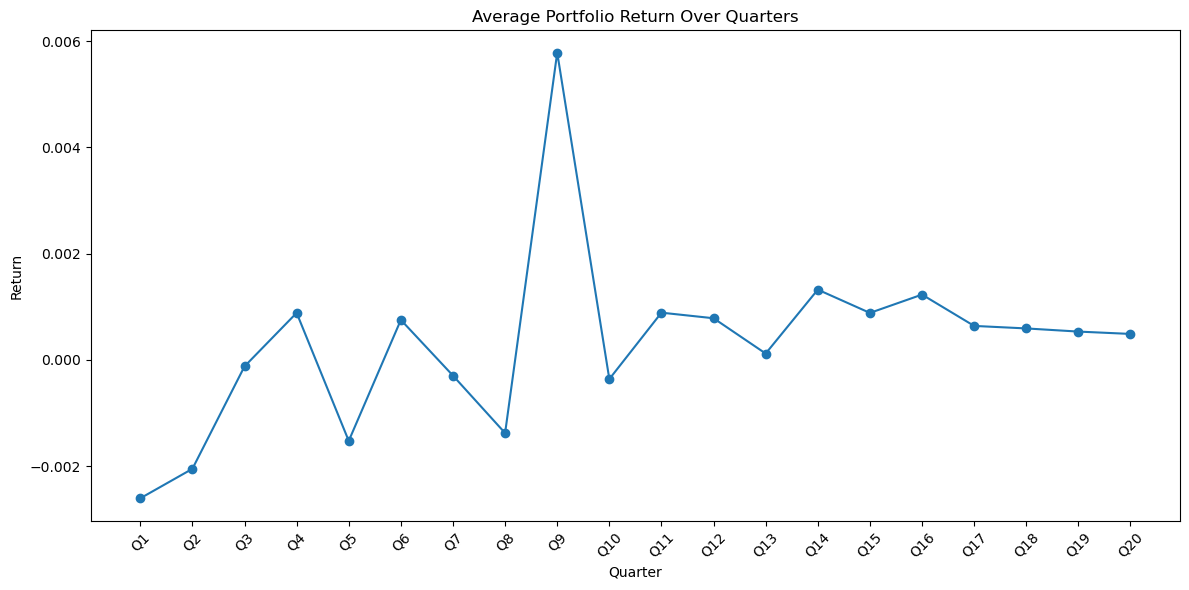

In [36]:
import matplotlib.pyplot as plt

# Define the quarters for the x-axis based on the number of rows in the DataFrame
quarters = [f'Q{i+1}' for i in range(len(quarterly_returns_df))]

plt.figure(figsize=(12, 6))
plt.plot(quarterly_returns_df['Average Portfolio Return'], marker='o', label='Average Portfolio Return')
plt.title('Average Portfolio Return Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Return')
plt.xticks(ticks=range(len(quarters)), labels=quarters, rotation=45)  # Set custom x-axis labels
plt.tight_layout()
plt.show()